# **Data Preparation (pt.1)**

In [ ]:
! pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"almasfathinirbah","key":"ee4d993c0c57e753ffbc7c9642731f20"}'}

In [ ]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              235KB  2021-10-01 17:39:01          13299  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           8003  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           3501  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           3081  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [ ]:
! kaggle datasets download -d kartik2112/fraud-detection

 97% 196M/202M [00:08<00:00, 15.0MB/s]
100% 202M/202M [00:08<00:00, 23.8MB/s]


In [ ]:
! mkdir fraud_dataset

In [ ]:
! unzip fraud-detection.zip -d fraud_dataset

Archive:  fraud-detection.zip
  inflating: fraud_dataset/fraudTest.csv  
  inflating: fraud_dataset/fraudTrain.csv  


# **Data Preparation (pt.2)**

In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# import libraries needed for this step
from sklearn import metrics
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import mean_squared_error, max_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score,roc_curve  # classification metrics
from imblearn.over_sampling import SMOTE # SMOTE
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler # scaling methods

from sklearn.model_selection import GridSearchCV # grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # randomized search cross validation

# supervised learning algorithms
from sklearn.ensemble import AdaBoostClassifier # Adaptive Boosting Classifier
from sklearn.ensemble import BaggingClassifier # Bootstrap Aggregating Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.naive_bayes import GaussianNB # Gaussain Naive Bayes
from xgboost import XGBClassifier #XG Boost Model
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbbors
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.ensemble import RandomForestClassifier # Random Forest

import statsmodels.api as sm # estimates statistical models
from sklearn.feature_selection import RFE #Recursive Feature Elimination for feature selection
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support as score
from statsmodels.stats.outliers_influence import variance_inflation_factor

import statsmodels.api as sm # estimates statistical models

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import max_error

from math import sqrt

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def dataset_overview(df):
    display(df.head())
    variables = df.shape[1]
    observations = df.shape[0]
    missings = df.isnull().sum().sum()
    missings_per = round(100 * df.isnull().sum().sum()/len(df),3)
    duplicated = df.duplicated().sum()
    duplicated_per = round(100 * df.duplicated().sum()/len(df),3)
    categ = len(df.select_dtypes(include=[np.number]).columns.values)
    numer = len(df.select_dtypes(exclude=[np.number]).columns.values)
    #names = ['Variables', 'Observations', 'Missings cells', 'Missing cells(%)','Duplicated rows','Duplicated rows(%)','Num cols','Categ cols']
    stats = list([variables, observations, missings, missings_per,duplicated,duplicated_per, categ, numer])
    over_df = pd.DataFrame({'General Overview':['Variables', 'Observations', 'Missings cells', 'Missing cells(%)','Duplicated rows','Duplicated rows(%)','Num cols','Categ cols'],
                           '': stats})
    over_df = over_df.set_index('General Overview')
    print(over_df)
        #################### categorical columns  ###############################################################
    print('\nVariable overview\n')
    print('Categorical variables')
    for x in list(df.select_dtypes(exclude=[np.number]).columns.values):
        print(x,'\n')
        print(f'unique values:         {len(df[x].unique())}')
        print(f'Missing values:        {df[x].isnull().sum()}')
        print(f'Missing values(%):     {df[x].isnull().sum()/len(df[x])}%')
        print(f'Mode:                  {df[x].mode()[0]}')
        print(f'Frequency:             {df[x].value_counts()[0]}\n')
        print(f'Data type:             {df[x].dtype}')
    
    #################### numerical columns  ###############################################################
    print('\nNumerical variables\n')
    for y in list(df.select_dtypes(include=[np.number]).columns.values):
        print(y,'\n')
        print(f'unique values:     {len(df[x].unique())}')
        print(f'Missing values:    {df[y].isnull().sum()}')
        print(f'Missing values(%): {df[y].isnull().sum()/len(df[y])}%')
        print(f'Minimum:           {df[y].min()}')
        print(f'Median:            {df[y].median()}')
        print(f'Mean:              {df[y].mean()}')
        print(f'Max:               {df[y].max()}')
        print(f'Data type:         {df[x].dtype}')

In [ ]:
# combining train and test datasets

df = pd.concat([pd.read_csv('/content/fraud_dataset/fraudTest.csv'),pd.read_csv('/content/fraud_dataset/fraudTrain.csv')], ignore_index=True)
df.drop('Unnamed: 0',axis=1,inplace=True) # unnecessary column
df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
print(df.shape)
print(df.columns)

(1852394, 22)
Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 22 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   trans_date_trans_time  object 
 1   cc_num                 int64  
 2   merchant               object 
 3   category               object 
 4   amt                    float64
 5   first                  object 
 6   last                   object 
 7   gender                 object 
 8   street                 object 
 9   city                   object 
 10  state                  object 
 11  zip                    int64  
 12  lat                    float64
 13  long                   float64
 14  city_pop               int64  
 15  job                    object 
 16  dob                    object 
 17  trans_num              object 
 18  unix_time              int64  
 19  merch_lat              float64
 20  merch_long             float64
 21  is_fraud               int64  
dtypes: float64(5), int

In [ ]:
dataset_overview(df)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


                             
General Overview             
Variables                22.0
Observations        1852394.0
Missings cells            0.0
Missing cells(%)          0.0
Duplicated rows           0.0
Duplicated rows(%)        0.0
Num cols                 10.0
Categ cols               12.0

Variable overview

Categorical variables
trans_date_trans_time 

unique values:         1819551
Missing values:        0
Missing values(%):     0.0%
Mode:                  2019-04-22 16:02:01
Frequency:             4

Data type:             object
merchant 

unique values:         693
Missing values:        0
Missing values(%):     0.0%
Mode:                  fraud_Kilback LLC
Frequency:             6262

Data type:             object
category 

unique values:         14
Missing values:        0
Missing values(%):     0.0%
Mode:                  gas_transport
Frequency:             188029

Data type:             object
first 

unique values:         355
Missing values:        0
Missing valu

# **Data Cleansing**

## **Handle the Date Column**

In [ ]:
# Function to calculate the distance between two adress
def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [ ]:
# clean date of DOB and trans_date_trans_time
dates_list = ['trans_date_trans_time','dob']
for x in dates_list:
   df[x] = pd.to_datetime(df[x])

In [ ]:
# get hours from the transaction
df['trans_hour'] =df['trans_date_trans_time'].dt.hour
# days when the transaction occured 
df['day_of_week'] =df['trans_date_trans_time'].dt.day_name()
# period when the transaction occured
df['year_month'] =df['trans_date_trans_time'].dt.to_period('M')
# the age of the client when the transaction occured
df['age'] = (np.round((df['trans_date_trans_time'] - df['dob'])/np.timedelta64(1,'Y')))

# create the column where the if the population is less than 25% to be rural, 25-50% ssemi-urban, and more than 50% urban
df['residence'] = pd.qcut(df.city_pop, q=[0, .25, .75, 1], labels=['rural', 'semi_urban', 'urban'])

# concanate the lat and longitude of client into one column and the same for the merchant location
df['lat_long'] = tuple(zip(*df[['lat','long']].values.T))
df['merch_ad'] = tuple(zip(*df[['merch_lat','merch_long']].values.T))


In [ ]:
# get the full name 
fullname = df[['first','last']].apply(lambda x: ' '.join(x),axis=1)
df.insert(7,'fullname',fullname)

In [ ]:
data_yes = df[df.is_fraud==1]
data_no = df[df.is_fraud==0]

In [ ]:
# create the distance column
df['distance'] = haversine_vectorize(df['long'],df['lat'],df['merch_long'],df['merch_lat'])

In [ ]:
# create age group

bins= [0,18,30,40,50,60,70, 110]
labels = ['under 18', '18 - 29', '30 - 39', '40 - 49', '50 - 59', '60 - 69', '70 or above']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
print (df['AgeGroup'])

0          50 - 59
1          30 - 39
2          50 - 59
3          30 - 39
4          60 - 69
            ...   
1852389    50 - 59
1852390    40 - 49
1852391    50 - 59
1852392    40 - 49
1852393    18 - 29
Name: AgeGroup, Length: 1852394, dtype: category
Categories (7, object): ['under 18' < '18 - 29' < '30 - 39' < '40 - 49' < '50 - 59' < '60 - 69' <
                         '70 or above']


# **Exploratory Data Analysis**

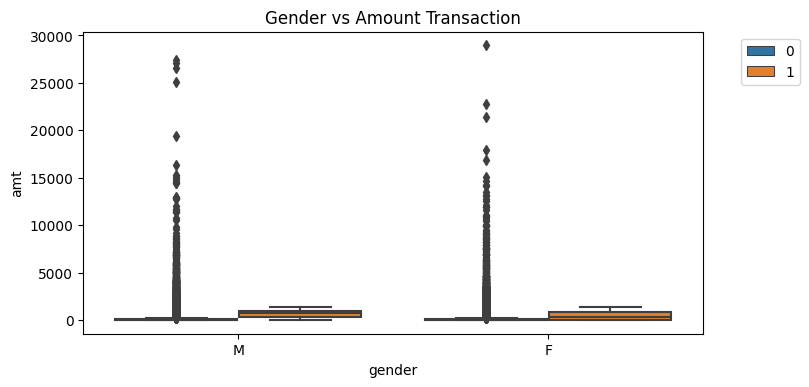

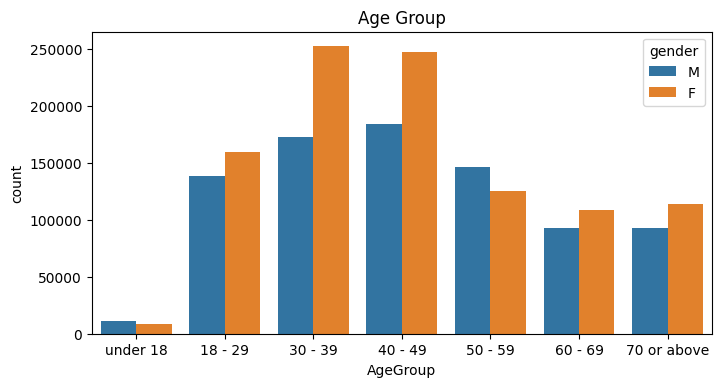

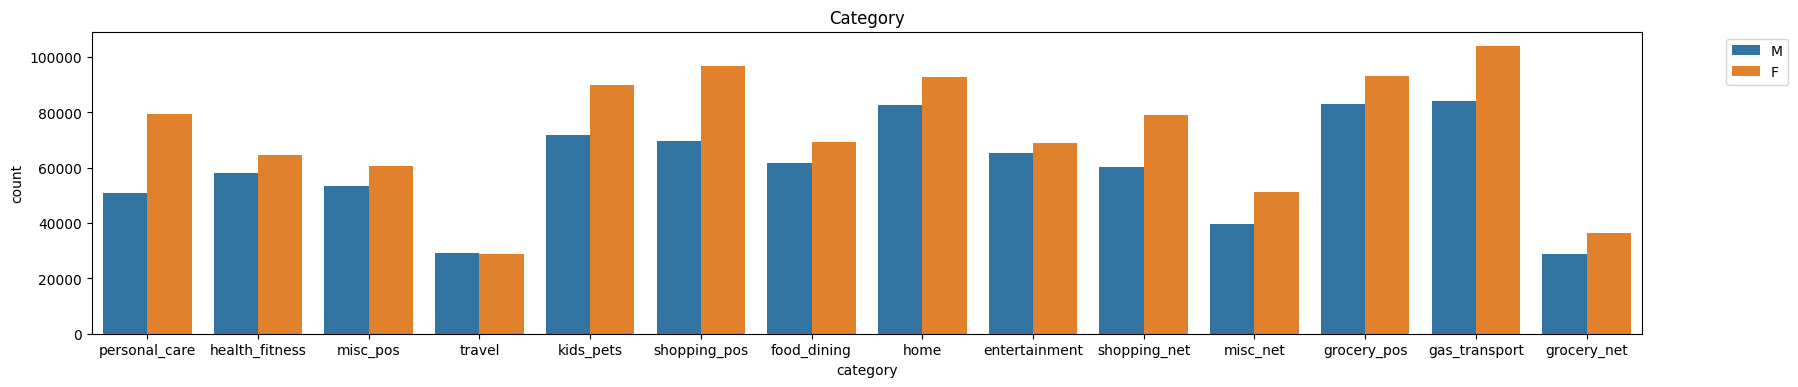

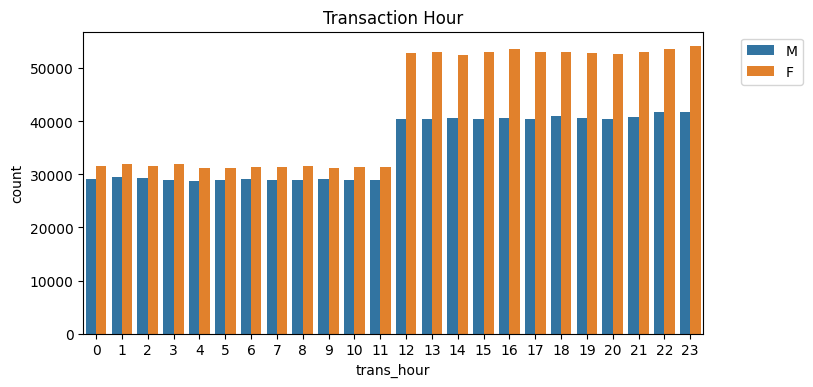

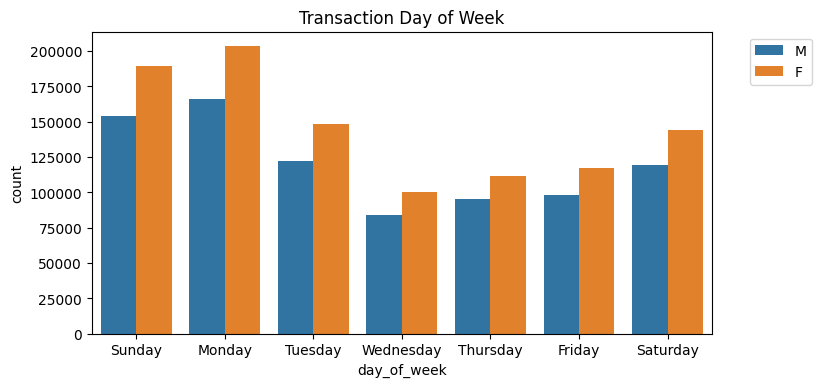

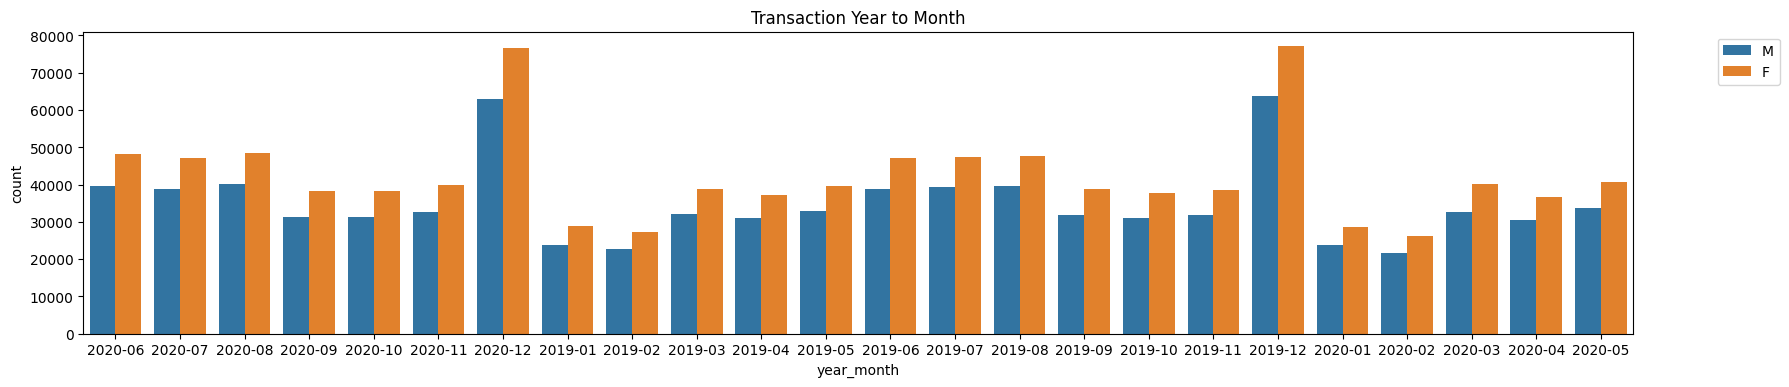

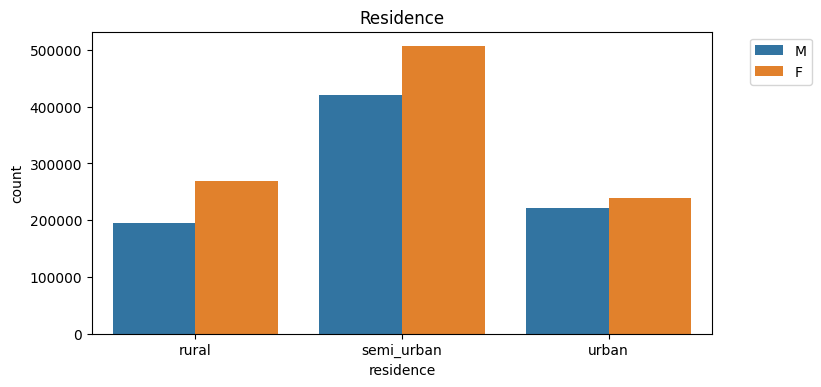

In [ ]:
#The distribution of TotalCharges per Contract type
plt.figure(figsize = (8, 4), dpi = 100)
sns.boxplot(data = df, x = "gender", y="amt", hue = "is_fraud")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Gender vs Amount Transaction')
plt.show()

plt.figure(figsize = (8, 4), dpi = 100)
sns.countplot(data = df, x = "AgeGroup", hue = "gender")
plt.title('Age Group')
plt.show()

plt.figure(figsize = (20, 4), dpi = 100)
sns.countplot(data = df, x = "category", hue = "gender")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Category')
plt.show()

plt.figure(figsize = (8, 4), dpi = 100)
sns.countplot(data = df, x = "trans_hour", hue = "gender")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Transaction Hour')
plt.show()

plt.figure(figsize = (8, 4), dpi = 100)
sns.countplot(data = df, x = "day_of_week", hue = "gender")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Transaction Day of Week')
plt.show()

plt.figure(figsize = (20, 4), dpi = 100)
sns.countplot(data = df, x = "year_month", hue = "gender")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Transaction Year to Month')
plt.show()

plt.figure(figsize = (8, 4), dpi = 100)
sns.countplot(data = df, x = "residence", hue = "gender")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Residence')
plt.show()

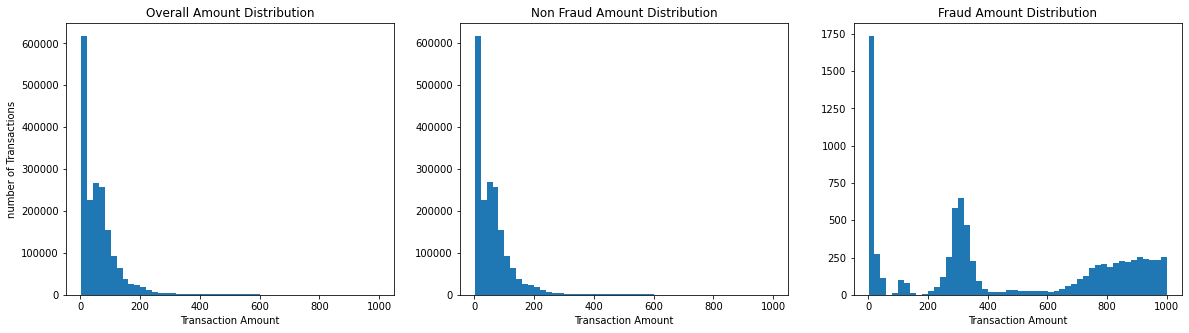

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(df[df['amt']<=1000]['amt'], bins=50)
ax[1].hist(df[(df['is_fraud']==0) & (df['amt']<=1000)]['amt'], bins=50)
ax[2].hist(df[(df['is_fraud']==1) & (df['amt']<=1000)]['amt'], bins=50)

ax[0].set_title('Overall Amount Distribution')
ax[1].set_title('Non Fraud Amount Distribution')
ax[2].set_title('Fraud Amount Distribution')

ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('number of Transactions')

ax[1].set_xlabel('Transaction Amount')
ax[2].set_xlabel('Transaction Amount')
plt.show()

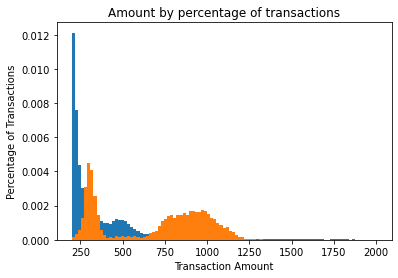

In [ ]:
bins = np.linspace(200, 2000, 100)
plt.hist(df[(df['is_fraud']==0)]['amt'], bins,alpha=1, density=True, label='Non Fraud' )
plt.hist(df[(df['is_fraud']==1)]['amt'], bins,alpha=1, density=True, label='Fraud')

plt.title('Amount by percentage of transactions')

plt.xlabel('Transaction Amount')
plt.ylabel('Percentage of Transactions')
plt.show()

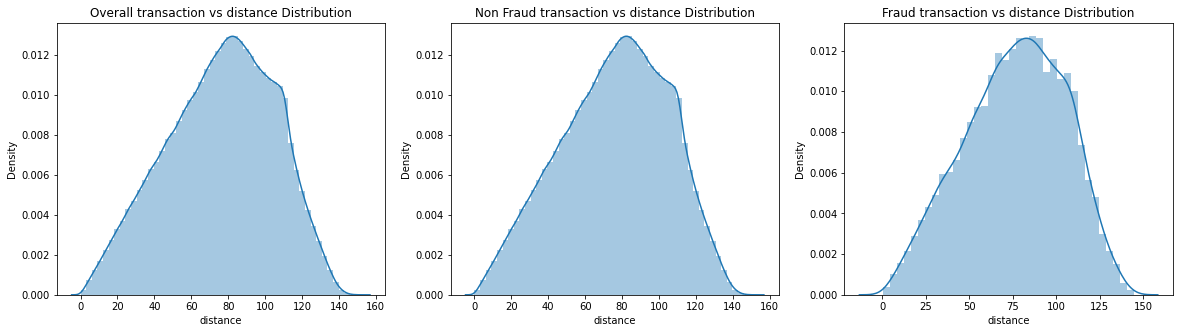

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
sns.distplot(df['distance'], ax= ax[0])#age distributio
sns.distplot(df[(df['is_fraud']==0)].distance, ax= ax[1]) # age distribution for fraudulent transaction
sns.distplot(df[(df['is_fraud']==1)].distance, ax= ax[2]) # age distribution for non fraudulent transaction 

ax[0].set_title('Overall transaction vs distance Distribution')
ax[1].set_title('Non Fraud transaction vs distance Distribution')
ax[2].set_title('Fraud transaction vs distance Distribution')

plt.show()

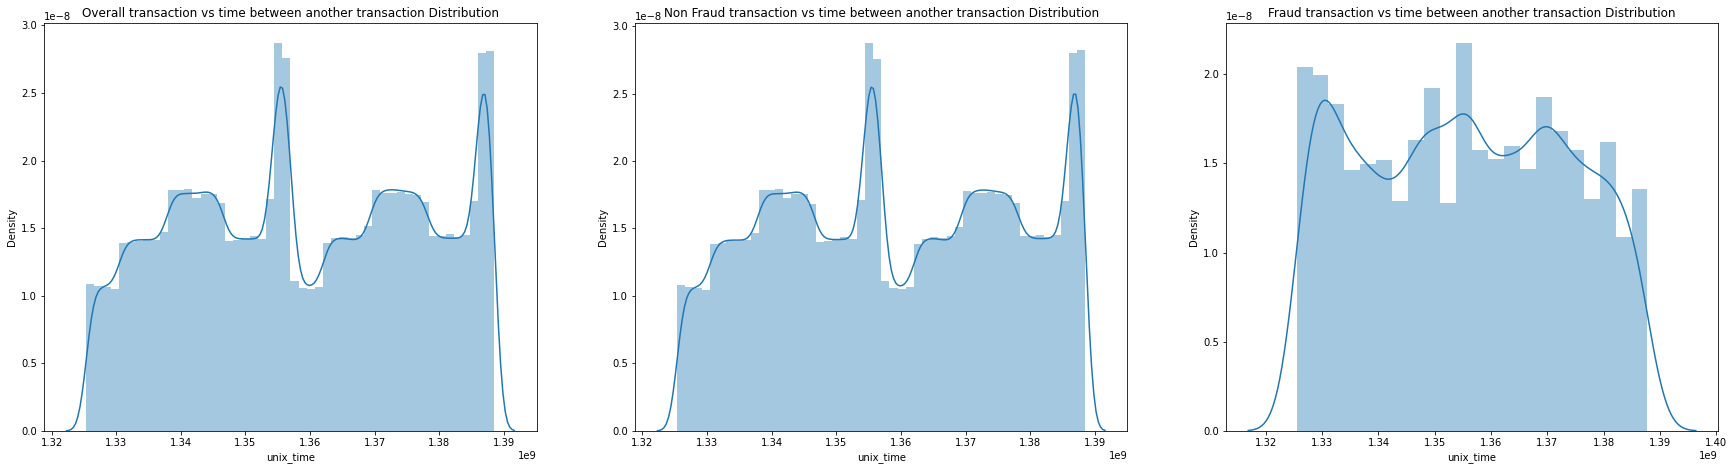

In [ ]:
fig, ax = plt.subplots(1,3,figsize=(30,7.5))
sns.distplot(df['unix_time'], ax= ax[0])#age distributio
sns.distplot(df[(df['is_fraud']==0)].unix_time, ax= ax[1]) # age distribution for fraudulent transaction
sns.distplot(df[(df['is_fraud']==1)].unix_time, ax= ax[2])
ax[0].set_title('Overall transaction vs time between another transaction Distribution')
ax[1].set_title('Non Fraud transaction vs time between another transaction Distribution')
ax[2].set_title('Fraud transaction vs time between another transaction Distribution')

plt.show()

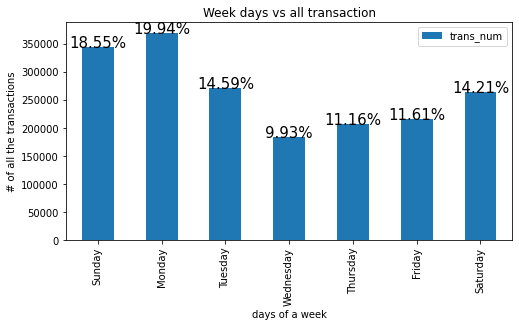

In [ ]:
ax = df.groupby(df['day_of_week'],sort=False)['trans_num'].nunique().reset_index().set_index('day_of_week').plot.bar(figsize=(8,4))
ax.set_ylabel('# of all the transactions')
ax.set_xlabel('days of a week')
ax.set_title('Week days vs all transaction')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(df)*100),
            ha="center", fontsize=15)
plt.show()

In [ ]:
fraud = df[(df['is_fraud']==1)] # fraud df
not_fraud = df[(df['is_fraud']==0)] # non fraud dataframe

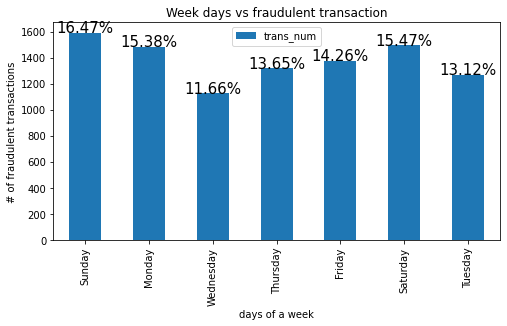

In [ ]:
ax = fraud.groupby(fraud['day_of_week'],sort=False)['trans_num'].nunique().reset_index().set_index('day_of_week').plot.bar(figsize=(8,4))
ax.set_ylabel('# of fraudulent transactions')
ax.set_xlabel('days of a week')
ax.set_title('Week days vs fraudulent transaction')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(fraud)*100),
            ha="center", fontsize=15)
plt.show()

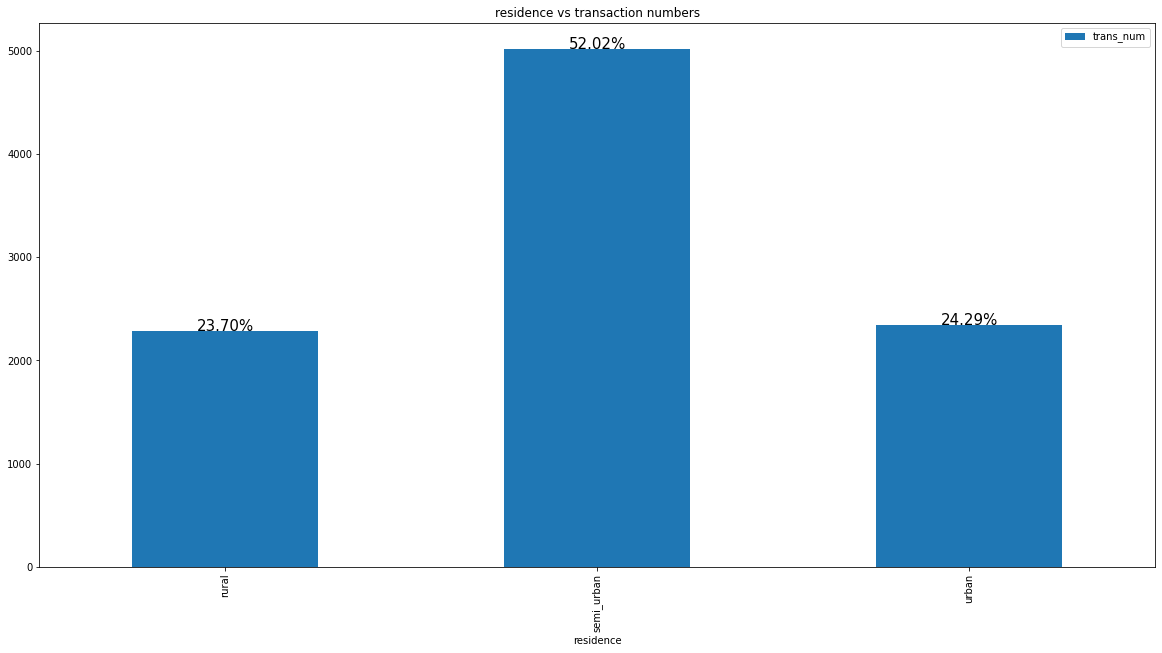

In [ ]:
ax = fraud.groupby(fraud['residence'])['trans_num'].nunique().reset_index().set_index('residence').plot.bar(figsize=(20,10))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(fraud)*100),
            ha="center", fontsize=15)
ax.set_title('residence vs transaction numbers')
plt.show()

In [ ]:
#Timeplot

df_timeline01 = fraud.groupby(fraud['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline01.columns = ['Year Month','Number of Fraud Transactions','Fraud Customers']
df_timeline01

,Year Month,Number of Fraud Transactions,Fraud Customers
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42
5,2019-06,354,35
6,2019-07,331,36
7,2019-08,382,39
8,2019-09,418,44
9,2019-10,454,50


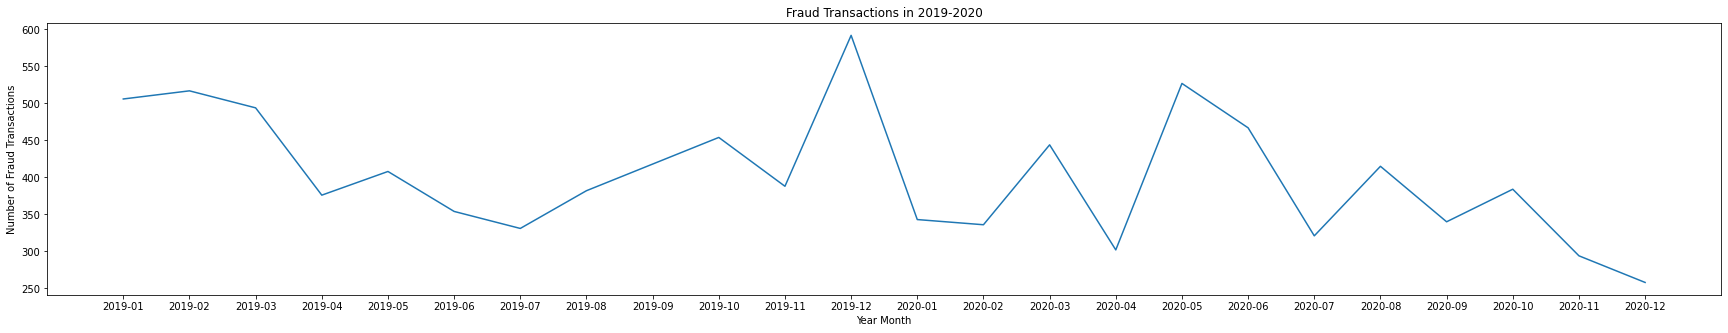

In [ ]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(30,5))
ax.plot(x,df_timeline01['Number of Fraud Transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['Year Month'])
ax.set_title('Fraud Transactions in 2019-2020')
ax.set_xlabel('Year Month')
ax.set_ylabel('Number of Fraud Transactions')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(fraud)*100),
            ha="center", fontsize=12)
    
plt.show()

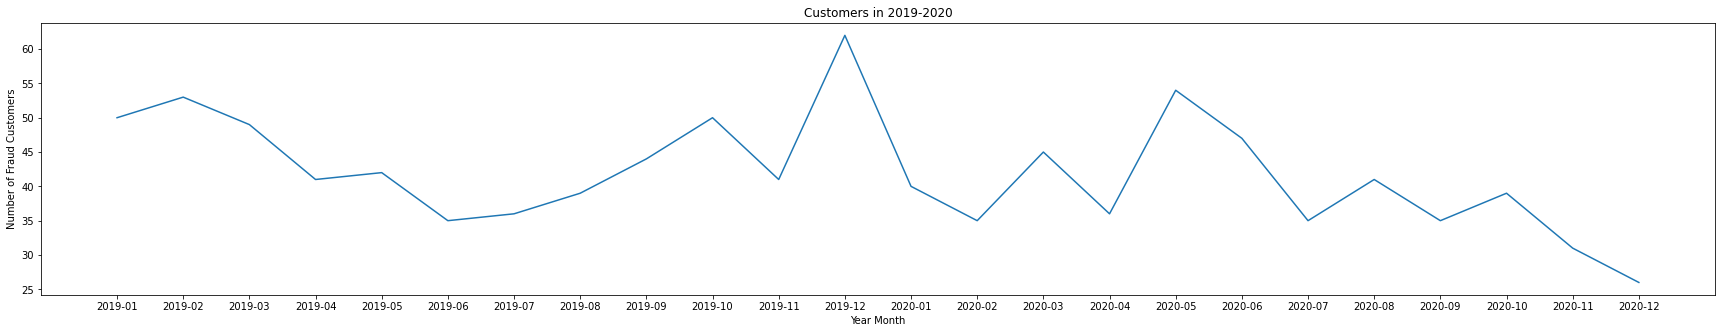

In [ ]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(30,5))
ax.plot(x,df_timeline01['Fraud Customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline01['Year Month'])
ax.set_title('Customers in 2019-2020')
ax.set_xlabel('Year Month')
ax.set_ylabel('Number of Fraud Customers')
plt.show()

In [ ]:
df_timeline02 = not_fraud.groupby(not_fraud['year_month'])[['trans_num','cc_num']].nunique().reset_index()
df_timeline02.columns = ['Year Month','Number of Non Fraud Transactions','Non Fraud Customers']
df_timeline02

,Year Month,Number of Non Fraud Transactions,Non Fraud Customers
0,2019-01,52019,908
1,2019-02,49349,908
2,2019-03,70445,908
3,2019-04,67702,908
4,2019-05,72124,908
5,2019-06,85710,908
6,2019-07,86265,908
7,2019-08,86977,908
8,2019-09,70234,908
9,2019-10,68304,908


In [ ]:
print(df_timeline02['Number of Non Fraud Transactions'].mean())

76780.95833333333


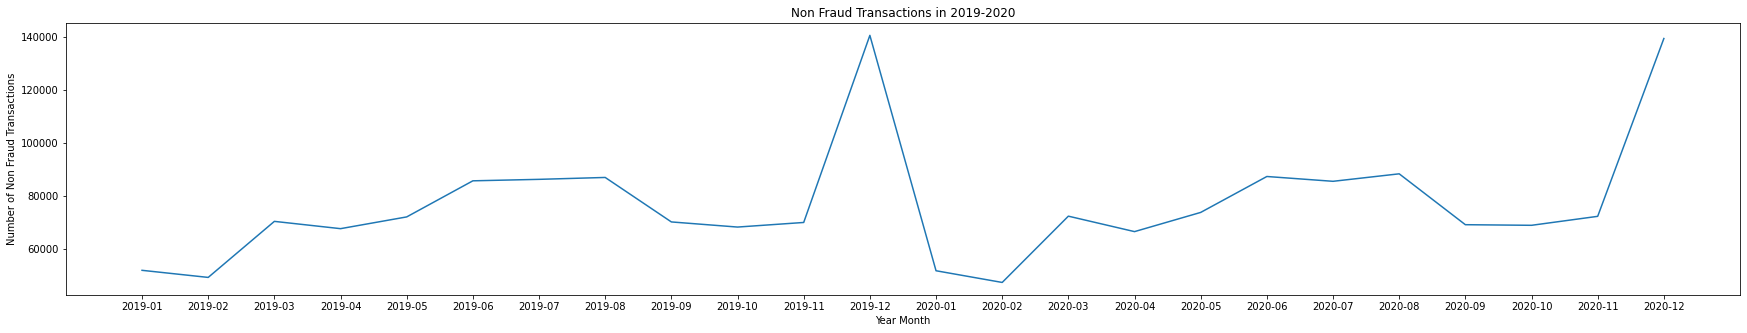

In [ ]:
x = np.arange(0,len(df_timeline02),1)

fig, ax = plt.subplots(1,1,figsize=(30,5))
ax.plot(x,df_timeline02['Number of Non Fraud Transactions'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['Year Month'])
ax.set_title('Non Fraud Transactions in 2019-2020')
ax.set_xlabel('Year Month')
ax.set_ylabel('Number of Non Fraud Transactions')
plt.show()

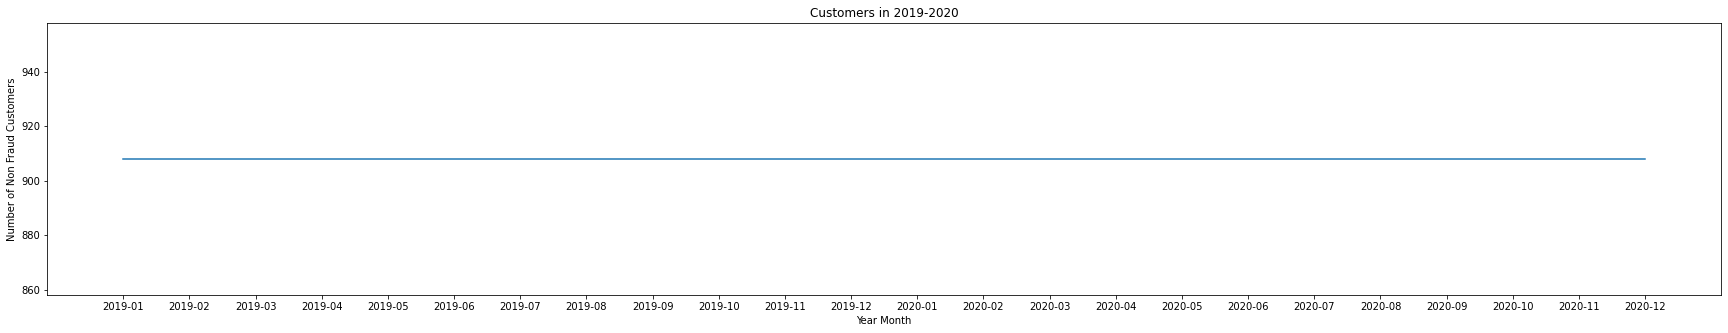

In [ ]:
x = np.arange(0,len(df_timeline01),1)

fig, ax = plt.subplots(1,1,figsize=(30,5))
ax.plot(x,df_timeline02['Non Fraud Customers'])
ax.set_xticks(x)
ax.set_xticklabels(df_timeline02['Year Month'])
ax.set_title('Customers in 2019-2020')
ax.set_xlabel('Year Month')
ax.set_ylabel('Number of Non Fraud Customers')
plt.show()

In [ ]:
#Gender
df_gender = df[['gender','trans_num']].groupby(['gender']).count().reset_index()
df_gender.columns = ['Gender','gender_count']

df_gender['percent'] = (df_gender['gender_count']/df_gender['gender_count'].sum())*100

df_gender

,Gender,gender_count,percent
0,F,1014749,54.780408
1,M,837645,45.219592


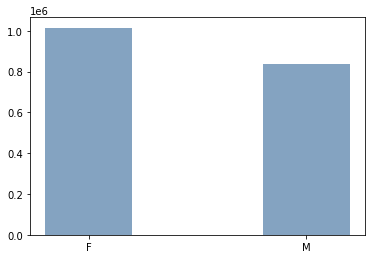

In [ ]:
plt.bar(df_gender['Gender'], df_gender['gender_count'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

In [ ]:
df_fraud_gender = df[['gender','is_fraud','trans_num']].groupby(['gender','is_fraud']).count().reset_index()
df_fraud_gender.columns = ['Gender','is_fraud','count']

df_fraud_gender = df_fraud_gender.merge(df_gender[['Gender','gender_count']],how='inner',\
                                  left_on='Gender',right_on='Gender')


df_fraud_gender['percent_grp'] = (df_fraud_gender['count']/df_fraud_gender['gender_count'])*100


df_fraud_gender

,Gender,is_fraud,count,gender_count,percent_grp
0,F,0,1009850,1014749,99.517221
1,F,1,4899,1014749,0.482779
2,M,0,832893,837645,99.432695
3,M,1,4752,837645,0.567305


In [ ]:
df_category = df[['category','trans_num']].groupby(['category']).count().reset_index()
df_category.columns = ['Category','category_count']

df_category['percent'] = (df_category['category_count']/df_category['category_count'].sum())*100

df_category.sort_values(by = ['percent'], ascending=False)

,Category,category_count,percent
2,gas_transport,188029,10.150594
4,grocery_pos,176191,9.511529
6,home,175460,9.472067
12,shopping_pos,166463,8.986371
7,kids_pets,161727,8.730702
11,shopping_net,139322,7.521186
0,entertainment,134118,7.240252
1,food_dining,130729,7.057300
10,personal_care,130085,7.022534
5,health_fitness,122553,6.615925


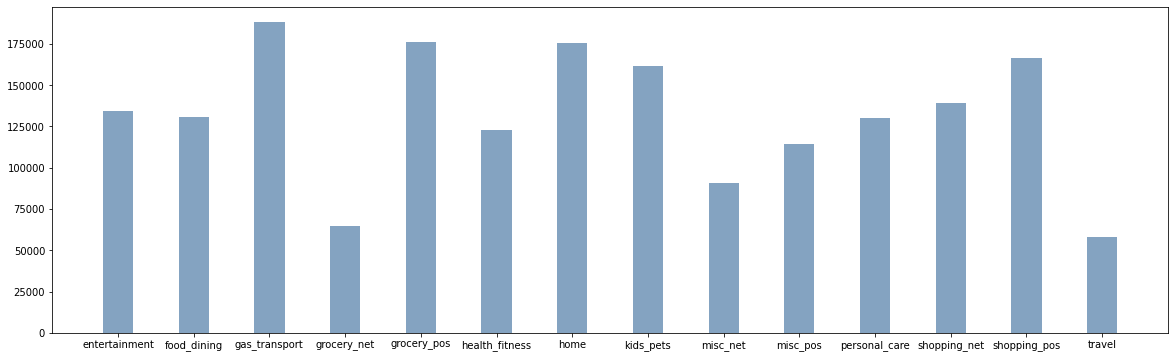

In [ ]:
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_category['Category'], df_category['category_count'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)

plt.show()

In [ ]:
df_fraud_category = df[['category','is_fraud','trans_num']].groupby(['category','is_fraud']).count().reset_index()
df_fraud_category.columns = ['Category','is_fraud','count']

df_fraud_category = df_fraud_category.merge(df_category[['Category','category_count','percent']],how='inner',\
                                  left_on='Category',right_on='Category')


df_fraud_category['percent_grp'] = (df_fraud_category['count']/df_fraud_category['category_count'])*100

In [ ]:
df_fraud_category.sort_values(by = ['category_count'], ascending=False)

,Category,is_fraud,count,category_count,percent,percent_grp
4,gas_transport,0,187257,188029,10.150594,99.589425
5,gas_transport,1,772,188029,10.150594,0.410575
8,grocery_pos,0,173963,176191,9.511529,98.735463
9,grocery_pos,1,2228,176191,9.511529,1.264537
13,home,1,265,175460,9.472067,0.151032
12,home,0,175195,175460,9.472067,99.848968
25,shopping_pos,1,1056,166463,8.986371,0.634375
24,shopping_pos,0,165407,166463,8.986371,99.365625
14,kids_pets,0,161423,161727,8.730702,99.812029
15,kids_pets,1,304,161727,8.730702,0.187971


In [ ]:
df_fraud=df_fraud_category[df_fraud_category['is_fraud'] == 1].sort_values(by = ['percent_grp'])
df_fraud

,Category,is_fraud,count,category_count,percent,percent_grp
11,health_fitness,1,185,122553,6.615925,0.150955
13,home,1,265,175460,9.472067,0.151032
3,food_dining,1,205,130729,7.057300,0.156813
15,kids_pets,1,304,161727,8.730702,0.187971
1,entertainment,1,292,134118,7.240252,0.217719
21,personal_care,1,290,130085,7.022534,0.222931
27,travel,1,156,57956,3.128708,0.269170
7,grocery_net,1,175,64878,3.502387,0.269737
19,misc_pos,1,322,114229,6.166561,0.281890
5,gas_transport,1,772,188029,10.150594,0.410575


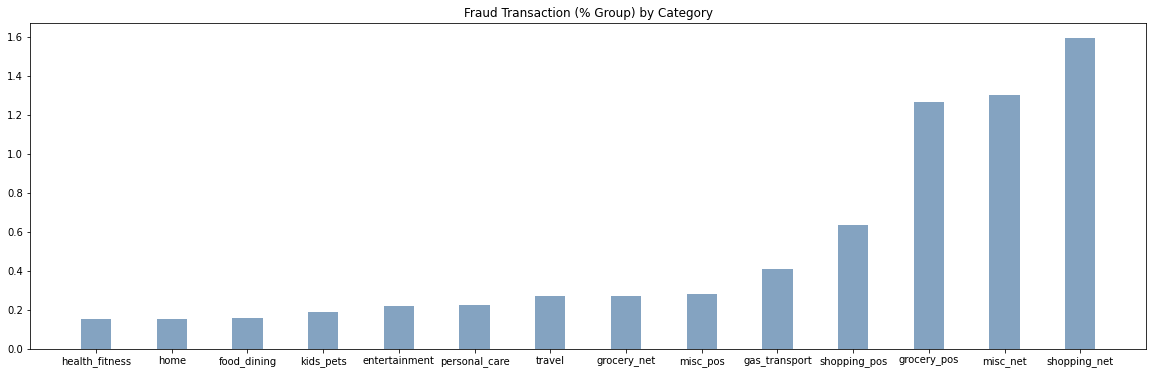

In [ ]:
fig = plt.figure(figsize = (20, 6)) 


plt.bar(df_fraud['Category'] , df_fraud['percent_grp'], color=(0.2, 0.4, 0.6, 0.6),  
        width = 0.4)
plt.title('Fraud Transaction (% Group) by Category')

plt.show()

In [ ]:
import plotly
import plotly.graph_objects as go 

In [ ]:
df_merchant = df[['merchant','trans_num']].groupby(['merchant']).count().reset_index()
df_merchant.columns = ['Merchant','merchant_count']

df_merchant['percent'] = (df_merchant['merchant_count']/df_merchant['merchant_count'].sum())*100

df_merchant.sort_values(by = ['percent'], ascending=False)

,Merchant,merchant_count,percent
316,fraud_Kilback LLC,6262,0.338049
105,fraud_Cormier LLC,5246,0.283201
571,fraud_Schumm PLC,5195,0.280448
349,fraud_Kuhn LLC,5031,0.271594
70,fraud_Boyer PLC,4999,0.269867
...,...,...,...
143,"fraud_Douglas, DuBuque and McKenzie",1101,0.059437
633,fraud_Treutel-King,1098,0.059275
544,fraud_Satterfield-Lowe,1095,0.059113
221,"fraud_Hahn, Douglas and Schowalter",1091,0.058897


In [ ]:
df_fraud_merchant = df[['merchant','is_fraud','trans_num']].groupby(['merchant','is_fraud']).count().reset_index()
df_fraud_merchant.columns = ['Merchant','is_fraud','count']

df_fraud_merchant = df_fraud_merchant.merge(df_merchant[['Merchant','merchant_count','percent']],how='inner',\
                                  left_on='Merchant',right_on='Merchant')


df_fraud_merchant['percent_grp'] = (df_fraud_merchant['count']/df_fraud_merchant['merchant_count'])*100

In [ ]:
df_job = df[['job','trans_num']].groupby(['job']).count().reset_index()
df_job.columns = ['Job','tran_count_by_job']

df_job['percent'] = (df_job['tran_count_by_job']/df_job['tran_count_by_job'].sum())*100

df_job.sort_values(by = ['percent'], ascending=False)

,Job,tran_count_by_job,percent
194,Film/video editor,13898,0.750272
188,Exhibition designer,13167,0.710810
442,"Surveyor, land/geomatics",12436,0.671347
309,Naval architect,12434,0.671239
287,Materials engineer,11711,0.632209
...,...,...,...
175,"Engineer, water",8,0.000432
485,Veterinary surgeon,8,0.000432
490,Warehouse manager,7,0.000378
423,Ship broker,7,0.000378


In [ ]:
df_fraud_job = df[['job','is_fraud','trans_num']].groupby(['job','is_fraud']).count().reset_index()
df_fraud_job.columns = ['Job','is_fraud','count']

df_fraud_job =  df_fraud_job.merge(df_job[['Job','tran_count_by_job','percent']],how='inner',\
                                  left_on='Job',right_on='Job')


df_fraud_job['percent_grp'] = (df_fraud_job['count']/df_fraud_job['tran_count_by_job'])*100

In [ ]:
job_plt_data = df_fraud_job.sort_values(by = ["tran_count_by_job"], ascending = False).head(20)
job_plt_data

,Job,is_fraud,count,tran_count_by_job,percent,percent_grp
378,Film/video editor,1,52,13898,0.750272,0.374155
377,Film/video editor,0,13846,13898,0.750272,99.625845
366,Exhibition designer,1,51,13167,0.710810,0.387332
365,Exhibition designer,0,13116,13167,0.710810,99.612668
861,"Surveyor, land/geomatics",0,12386,12436,0.671347,99.597941
862,"Surveyor, land/geomatics",1,50,12436,0.671347,0.402059
603,Naval architect,1,66,12434,0.671239,0.530803
602,Naval architect,0,12368,12434,0.671239,99.469197
559,Materials engineer,1,62,11711,0.632209,0.529417
558,Materials engineer,0,11649,11711,0.632209,99.470583


In [ ]:
job_plt_data['label'] = 'Not Fraud'
job_plt_data.loc[job_plt_data['is_fraud']==1,['label']]= 'Fraud'
job_plt_data

,Job,is_fraud,count,tran_count_by_job,percent,percent_grp,label
378,Film/video editor,1,52,13898,0.750272,0.374155,Fraud
377,Film/video editor,0,13846,13898,0.750272,99.625845,Not Fraud
366,Exhibition designer,1,51,13167,0.710810,0.387332,Fraud
365,Exhibition designer,0,13116,13167,0.710810,99.612668,Not Fraud
861,"Surveyor, land/geomatics",0,12386,12436,0.671347,99.597941,Not Fraud
862,"Surveyor, land/geomatics",1,50,12436,0.671347,0.402059,Fraud
603,Naval architect,1,66,12434,0.671239,0.530803,Fraud
602,Naval architect,0,12368,12434,0.671239,99.469197,Not Fraud
559,Materials engineer,1,62,11711,0.632209,0.529417,Fraud
558,Materials engineer,0,11649,11711,0.632209,99.470583,Not Fraud


In [ ]:
ne_grp = job_plt_data['Job'].unique()
print(ne_grp)

rm_grp = job_plt_data['label'].unique()
print(rm_grp)

['Film/video editor' 'Exhibition designer' 'Surveyor, land/geomatics'
 'Naval architect' 'Materials engineer' 'Designer, ceramics/pottery'
 'Environmental consultant' 'Financial adviser' 'Systems developer'
 'IT trainer']
['Fraud' 'Not Fraud']


In [ ]:
fig = go.Figure(data=[
    go.Bar(name=rm_grp[0], x = ne_grp, y = job_plt_data[job_plt_data['label'] == rm_grp[0]]['percent_grp']),
    #go.Bar(name=rm_grp[1], x = ne_grp, y = job_plt_data[job_plt_data['label'] == rm_grp[1]]['percent_grp'])
])
# Change the bar mode
fig.update_layout(xaxis_title="Job Group "\
                  ,yaxis_title="Fraud Percent of Listings")
fig.show()

## **Map**

In [ ]:
from ipywidgets import interact
fig = go.FigureWidget()
scatt = fig.add_histogram()

xs = df
@interact(state = df['state'].unique(), \
          gender = df['gender'].unique(),\
          age = (14,100,5),
          is_fraud = [0,1])

def update(state = 'NC',gender = 'M', age = 14,is_fraud=1):
    with fig.batch_update():
        scatt = df[(df['state'] == state) \
                   & (df['gender'] == gender) \
                   & (df['age'] >= age) \
                   & (df['is_fraud'] == is_fraud)]['amt']
        fig.data[0].x=scatt
fig.update_layout(xaxis_title="Number of transaction"
                  ,yaxis_title="Transaction amount")

interactive(children=(Dropdown(description='state', index=42, options=('SC', 'UT', 'NY', 'FL', 'MI', 'CA', 'SD…

FigureWidget({
    'data': [{'type': 'histogram',
              'uid': '1156fdce-21dd-4d7e-baaa-a4f7b6eb0926',…

In [ ]:
dftemp_fraud = df[df['is_fraud'] == 1]
fig = go.Figure()
fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = dftemp_fraud['long'],
        lat = dftemp_fraud['lat'],
        #text = df_sub['text'],
        marker = dict(
            #size = df_sub['total_cases']/scale,
            color = dftemp_fraud['is_fraud'],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = 'test'))
fig.update_layout( title_text = 'test',
                 geo = dict(
                     landcolor = 'rgb(217,217,217)',),
                  mapbox_style="open-street-map"
                 )

In [ ]:
import plotly.express as px 

df_fraud = df[df['is_fraud'] == 1]

fig = px.scatter_mapbox(df_fraud, lat="lat", lon="long", hover_name="city",
                         zoom=3, height=500,
                         color="is_fraud",  color_discrete_sequence=px.colors.cyclical.IceFire)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

## **Correlation Heatmap**

Text(0.5, 1.0, 'Correlation heatmap')

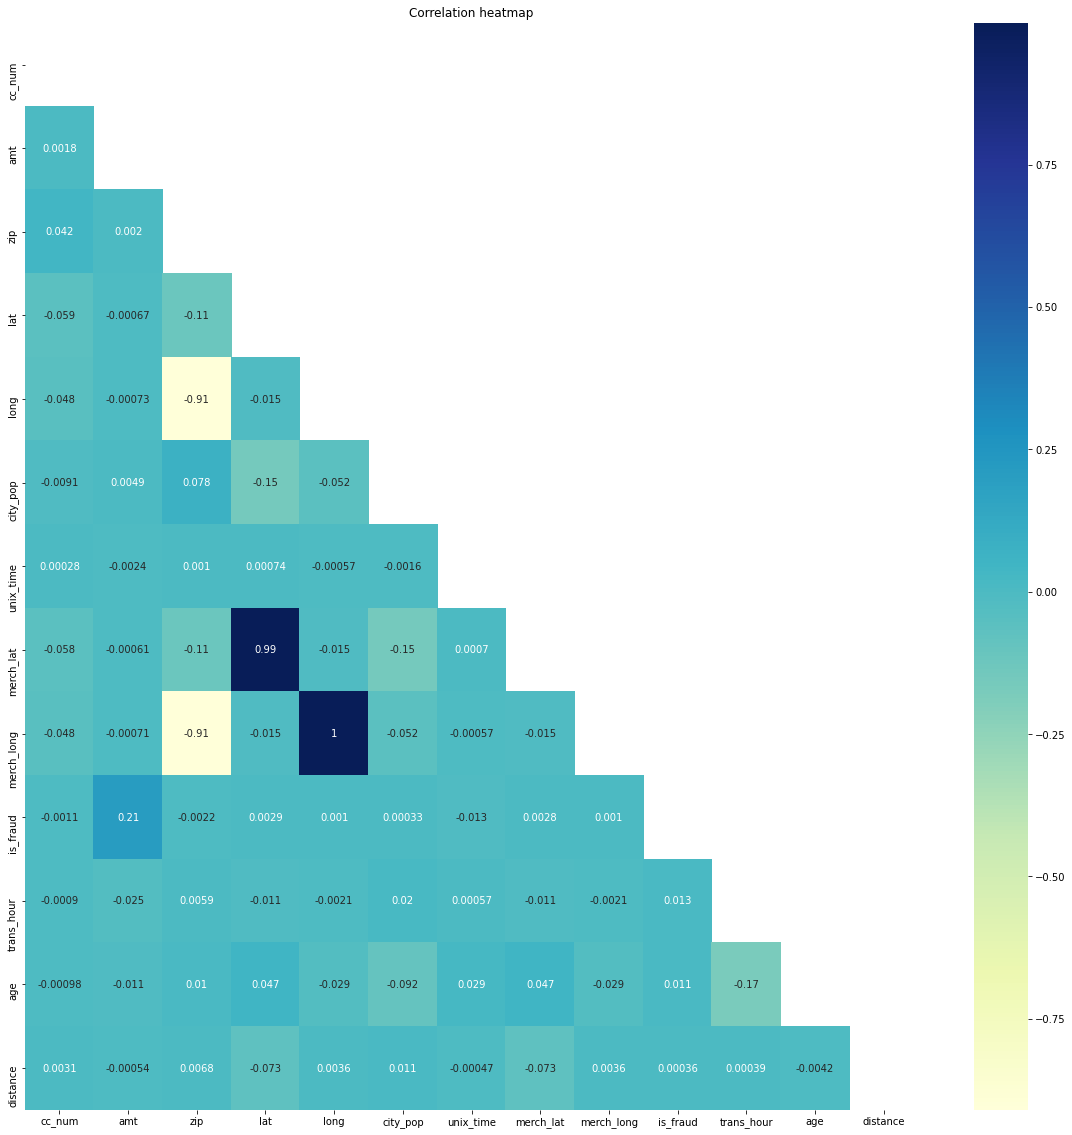

In [ ]:
#Display correlation heatmap
mask = np.triu(np.ones_like(df.corr()))
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, cmap="YlGnBu", mask=mask).set_title('Correlation heatmap')

# **Modelling**

## Preparation

In [ ]:
dframe = df.copy()
dframe = dframe.drop(['cc_num','first','last','trans_date_trans_time','fullname', 'merchant','trans_num','street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop','dob', 'merch_lat', 'merch_long','lat_long',
       'merch_ad','job','year_month', 'AgeGroup'],axis=1)
dframe = dframe.loc[:499999]
dframe

,category,amt,gender,unix_time,is_fraud,trans_hour,day_of_week,age,residence,distance
0,personal_care,2.86,M,1371816865,0,12,Sunday,52.0,urban,24.546041
1,personal_care,29.84,F,1371816873,0,12,Sunday,30.0,rural,104.859216
2,health_fitness,41.28,F,1371816893,0,12,Sunday,50.0,urban,59.042985
3,misc_pos,60.05,M,1371816915,0,12,Sunday,33.0,urban,27.681177
4,travel,3.19,M,1371816917,0,12,Sunday,65.0,semi_urban,104.269600
...,...,...,...,...,...,...,...,...,...,...
499995,gas_transport,76.65,M,1387500745,0,0,Sunday,40.0,urban,126.542495
499996,grocery_pos,66.25,M,1387500745,0,0,Sunday,44.0,urban,81.341516
499997,food_dining,72.42,M,1387500746,0,0,Sunday,92.0,semi_urban,44.997590
499998,shopping_pos,3.01,M,1387500791,0,0,Sunday,82.0,rural,96.965803


In [ ]:
#dframe['is_fraud'].value_counts

#Gender
df_fraud_model = dframe[['is_fraud','unix_time']].groupby(['is_fraud']).count().reset_index()
df_fraud_model.columns = ['is_fraud','fraud_count']

df_fraud_model['percent'] = (df_fraud_model['fraud_count']/df_fraud_model['fraud_count'].sum())*100

df_fraud_model

,is_fraud,fraud_count,percent
0,0,497876,99.5752
1,1,2124,0.4248


In [ ]:
# creating a dummy variable for one of the categorical variables and drop the first ones
dummy_var1 = pd.get_dummies(dframe[['category', 'day_of_week', 'gender', 'residence']], drop_first= False)
# adding the results to the master dataframe
dframe = pd.concat([dframe, dummy_var1], axis=1)
#dropping the repeated variables
dframe = dframe.drop(['category', 'day_of_week', 'gender', 'residence'],1)

In [ ]:
# select columns to scale 
to_scale = [col for col in dframe.columns if dframe[col].max()>1]
scaler = RobustScaler()
scaled =scaler.fit_transform(dframe[to_scale])
scaled = pd.DataFrame(scaled, columns=to_scale)

# replace original columns with scaled columns
for col in scaled:
    dframe[col] = scaled[col]

In [ ]:
#make a copy of this dataframe
df_model = dframe.copy()

In [ ]:
X = df_model.drop(['is_fraud'],axis=1) 
y = df_model['is_fraud'] #target variable

In [ ]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

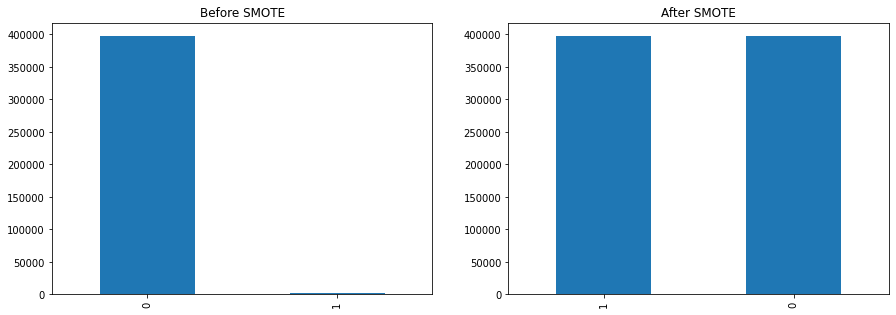

In [ ]:
#Resampling via SMOTE

sm = SMOTE()
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.bar(ax=ax2)

plt.show()

In [ ]:
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

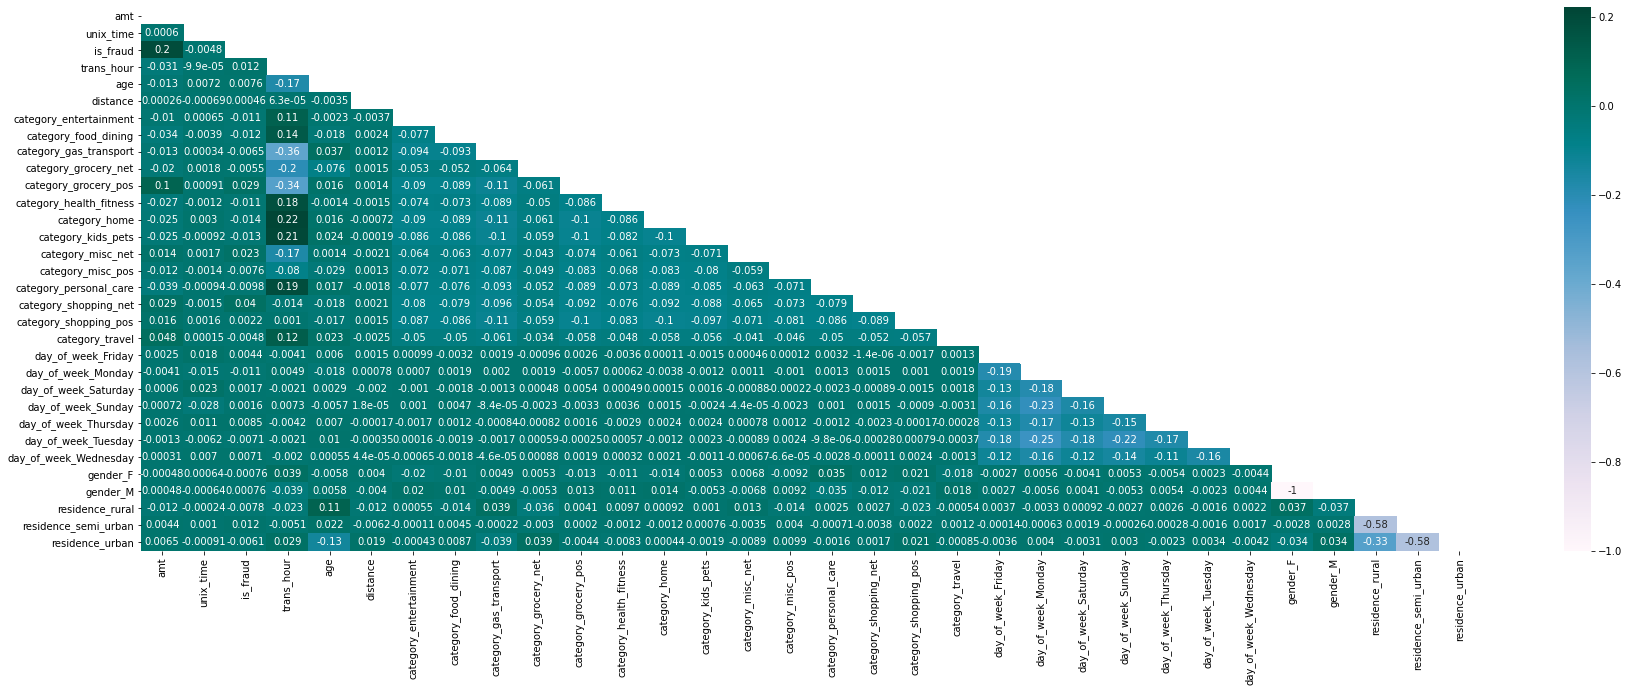

In [ ]:
# let's see the correlation matrix
mask = np.triu(np.ones_like(df_model.corr()))
plt.figure(figsize= (30, 10))
sns.heatmap(df_model.corr(), annot=True, cmap= 'PuBuGn', mask= mask)
plt.show()

## **Training and Evaluation**

Adaboost

In [ ]:
adabc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=100, random_state=42)
adabc.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [ ]:
print("Train Results")
pred_train = adabc.predict(X_train)

print(confusion_matrix(y_train,pred_train))
print('\n')
print(classification_report(y_train,pred_train))
print('\n')
print("MAE test score:", mean_absolute_error(y_train, pred_train))
print("RMSE test score:", sqrt(mean_squared_error(y_train, pred_train)))

Train Results
[[386135  12135]
 [ 15418 382852]]


              precision    recall  f1-score   support

           0       0.96      0.97      0.97    398270
           1       0.97      0.96      0.97    398270

    accuracy                           0.97    796540
   macro avg       0.97      0.97      0.97    796540
weighted avg       0.97      0.97      0.97    796540



MAE test score: 0.034590855449820476
RMSE test score: 0.18598617004987353


In [ ]:
print("Test Results")
pred_test = adabc.predict(X_test)

print(confusion_matrix(y_test,pred_test))
print('\n')
print(classification_report(y_test,pred_test))
print('\n')
print("MAE test score:", mean_absolute_error(y_test, pred_test))
print("RMSE test score:", sqrt(mean_squared_error(y_test, pred_test)))

Test Results
[[96522  3084]
 [   55   339]]


              precision    recall  f1-score   support

           0       1.00      0.97      0.98     99606
           1       0.10      0.86      0.18       394

    accuracy                           0.97    100000
   macro avg       0.55      0.91      0.58    100000
weighted avg       1.00      0.97      0.98    100000



MAE test score: 0.03139
RMSE test score: 0.17717223258738937


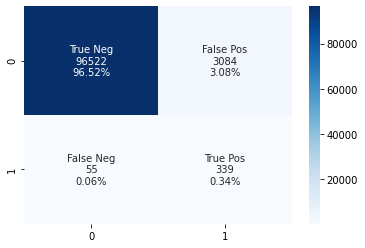

In [ ]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,pred_test)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

Decision Tree

In [ ]:
#Building Decision Tree Model
dt_clf = DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=42)
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
print("Train Results")
pred_train = dt_clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print('\n')
print(classification_report(y_train, pred_train))
print('\n')
print("MAE test score:", mean_absolute_error(y_train, pred_train))
print("RMSE test score:", sqrt(mean_squared_error(y_train, pred_train)))

Train Results
[[396752   1518]
 [    52 398218]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    398270
           1       1.00      1.00      1.00    398270

    accuracy                           1.00    796540
   macro avg       1.00      1.00      1.00    796540
weighted avg       1.00      1.00      1.00    796540



MAE test score: 0.0019710246817485626
RMSE test score: 0.044396223732977136


In [ ]:
print("Test Results")
pred_test = dt_clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print('\n')
print(classification_report(y_test, pred_test))
print('\n')
print("MAE test score:", mean_absolute_error(y_test, pred_test))
print("RMSE test score:", sqrt(mean_squared_error(y_test, pred_test)))

Test Results
[[99118   488]
 [   67   327]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99606
           1       0.40      0.83      0.54       394

    accuracy                           0.99    100000
   macro avg       0.70      0.91      0.77    100000
weighted avg       1.00      0.99      1.00    100000



MAE test score: 0.00555
RMSE test score: 0.0744983221287567


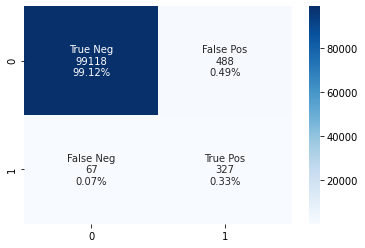

In [ ]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,pred_test)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

Gaussian Naive Bayes

In [ ]:
#param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}

In [ ]:
#nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=3, cv=10, n_jobs=-1)
gnb = GaussianNB()

In [ ]:
gnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
print("Train Results")
pred_train = gnb.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print('\n')
print(classification_report(y_train, pred_train))
print('\n')
print("MAE test score:", mean_absolute_error(y_train, pred_train))
print("RMSE test score:", sqrt(mean_squared_error(y_train, pred_train)))

Train Results
[[280257 118013]
 [111345 286925]]


              precision    recall  f1-score   support

           0       0.72      0.70      0.71    398270
           1       0.71      0.72      0.71    398270

    accuracy                           0.71    796540
   macro avg       0.71      0.71      0.71    796540
weighted avg       0.71      0.71      0.71    796540



MAE test score: 0.2879428528385266
RMSE test score: 0.5366030682343575


In [ ]:
print("Test Results")
pred_test = gnb.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print('\n')
print(classification_report(y_test, pred_test))
print('\n')
print("MAE test score:", mean_absolute_error(y_test, pred_test))
print("RMSE test score:", sqrt(mean_squared_error(y_test, pred_test)))

Test Results
[[69719 29887]
 [  122   272]]


              precision    recall  f1-score   support

           0       1.00      0.70      0.82     99606
           1       0.01      0.69      0.02       394

    accuracy                           0.70    100000
   macro avg       0.50      0.70      0.42    100000
weighted avg       0.99      0.70      0.82    100000



MAE test score: 0.30009
RMSE test score: 0.5478047097278372


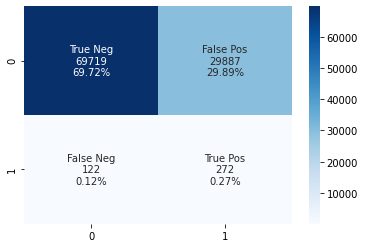

In [ ]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,pred_test)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

Gradient Boosting Tress

In [ ]:
# fit model no training data
xbt_model = XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, verbose = 3, random_state=42)
xbt_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbose=3, verbosity=1)

In [ ]:
print("Train Results")
pred_train = xbt_model.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print('\n')
print(classification_report(y_train, pred_train))
print('\n')
print("MAE test score:", mean_absolute_error(y_train, pred_train))
print("RMSE test score:", sqrt(mean_squared_error(y_train, pred_train)))

Train Results
[[390545   7725]
 [ 11516 386754]]


              precision    recall  f1-score   support

           0       0.97      0.98      0.98    398270
           1       0.98      0.97      0.98    398270

    accuracy                           0.98    796540
   macro avg       0.98      0.98      0.98    796540
weighted avg       0.98      0.98      0.98    796540



MAE test score: 0.02415572350415547
RMSE test score: 0.1554211166610106


In [ ]:
print("Test Results")
pred_test = xbt_model.predict(X_test.values)

print(confusion_matrix(y_test, pred_test))
print('\n')
print(classification_report(y_test, pred_test))
print('\n')
print("MAE test score:", mean_absolute_error(y_test, pred_test))
print("RMSE test score:", sqrt(mean_squared_error(y_test, pred_test)))

Test Results
[[97602  2004]
 [   38   356]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     99606
           1       0.15      0.90      0.26       394

    accuracy                           0.98    100000
   macro avg       0.58      0.94      0.62    100000
weighted avg       1.00      0.98      0.99    100000



MAE test score: 0.02042
RMSE test score: 0.14289856542317


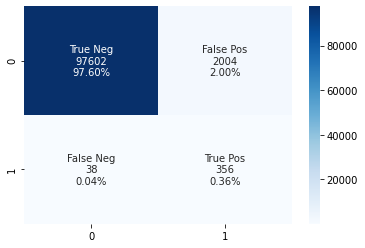

In [ ]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,pred_test)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

KNN

In [ ]:
### Determining the number of neighbors using RandomizedSearchCV
#param_grid = {    'n_neighbors': range(1,5),    "weights": ["uniform", "distance"]}
#knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid, verbose=3)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print("Train Results")
pred_train = knn.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print('\n')
print(classification_report(y_train, pred_train))
print('\n')
print("MAE test score:", mean_absolute_error(y_train, pred_train))
print("RMSE test score:", sqrt(mean_squared_error(y_train, pred_train)))

Train Results
[[396608   1662]
 [     0 398270]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    398270
           1       1.00      1.00      1.00    398270

    accuracy                           1.00    796540
   macro avg       1.00      1.00      1.00    796540
weighted avg       1.00      1.00      1.00    796540



MAE test score: 0.002086524217239561
RMSE test score: 0.04567848746663533


In [ ]:
print("Test Results")
pred_test = knn.predict(X_test)
5
print(confusion_matrix(y_test, pred_test))
print('\n')
print(classification_report(y_test, pred_test))
print('\n')
print("MAE test score:", mean_absolute_error(y_test, pred_test))
print("RMSE test score:", sqrt(mean_squared_error(y_test, pred_test)))

Test Results
[[98981   625]
 [   89   305]]


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     99606
           1       0.33      0.77      0.46       394

    accuracy                           0.99    100000
   macro avg       0.66      0.88      0.73    100000
weighted avg       1.00      0.99      0.99    100000



MAE test score: 0.00714
RMSE test score: 0.08449852069711043


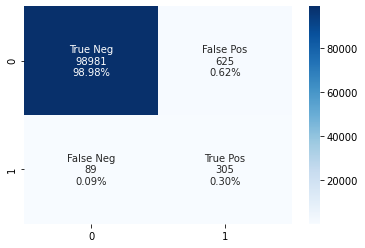

In [ ]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,pred_test)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

Random Forest Clasifier

In [ ]:
clf=RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
print("Train Results")
pred_train = clf.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print('\n')
print(classification_report(y_train, pred_train))
print('\n')
print("MAE test score:", mean_absolute_error(y_train, pred_train))
print("RMSE test score:", sqrt(mean_squared_error(y_train, pred_train)))

Train Results
[[398270      0]
 [     0 398270]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    398270
           1       1.00      1.00      1.00    398270

    accuracy                           1.00    796540
   macro avg       1.00      1.00      1.00    796540
weighted avg       1.00      1.00      1.00    796540



MAE test score: 0.0
RMSE test score: 0.0


In [ ]:
print("Test Results")
pred_test = clf.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print('\n')
print(classification_report(y_test, pred_test))
print('\n')
print("MAE test score:", mean_absolute_error(y_test, pred_test))
print("RMSE test score:", sqrt(mean_squared_error(y_test, pred_test)))

Test Results
[[99559    47]
 [  104   290]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99606
           1       0.86      0.74      0.79       394

    accuracy                           1.00    100000
   macro avg       0.93      0.87      0.90    100000
weighted avg       1.00      1.00      1.00    100000



MAE test score: 0.00151
RMSE test score: 0.03885871845545089


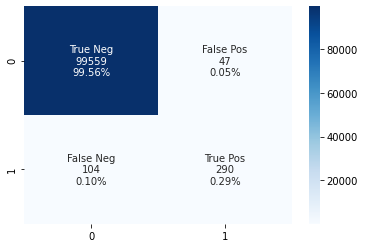

In [ ]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,pred_test)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

Logistic Regression

In [ ]:
logreg = LogisticRegression(random_state=42)

In [ ]:
#Building Logistic Regression  Model
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print("Train Results")
pred_train = logreg.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print('\n')
print(classification_report(y_train, pred_train))
print('\n')
print("MAE test score:", mean_absolute_error(y_train, pred_train))
print("RMSE test score:", sqrt(mean_squared_error(y_train, pred_train)))

Train Results
[[352950  45320]
 [ 94105 304165]]


              precision    recall  f1-score   support

           0       0.79      0.89      0.84    398270
           1       0.87      0.76      0.81    398270

    accuracy                           0.82    796540
   macro avg       0.83      0.82      0.82    796540
weighted avg       0.83      0.82      0.82    796540



MAE test score: 0.17503829060687473
RMSE test score: 0.4183757767926756


In [ ]:
print("Test Results")
pred_test = logreg.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print('\n')
print(classification_report(y_test, pred_test))
print('\n')
print("MAE test score:", mean_absolute_error(y_test, pred_test))
print("RMSE test score:", sqrt(mean_squared_error(y_test, pred_test)))

Test Results
[[88123 11483]
 [   96   298]]


              precision    recall  f1-score   support

           0       1.00      0.88      0.94     99606
           1       0.03      0.76      0.05       394

    accuracy                           0.88    100000
   macro avg       0.51      0.82      0.49    100000
weighted avg       1.00      0.88      0.93    100000



MAE test score: 0.11579
RMSE test score: 0.3402792970487626


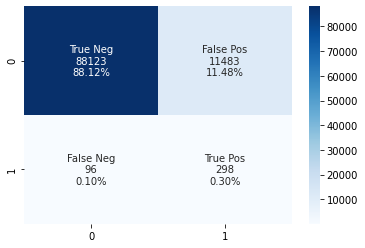

In [ ]:
#Get the confusion matrix
cf_matrix = confusion_matrix(y_test,pred_test)

group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt="", cmap='Blues')

## **Classification Evaluation via AUROC**

In [ ]:
# Instantiate the classfiers and make a list
classifiers = [AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200),               
               DecisionTreeClassifier(criterion = 'gini', max_depth = 20, random_state=42),
               GaussianNB(priors=None, var_smoothing=0.01519911082952933), 
               XGBClassifier(n_estimators = 100, learning_rate = 0.1, max_depth = 3, verbose = 3, random_state=42),
               KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=None, n_neighbors=5, p=2, weights='uniform'),
               LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='auto', n_jobs=None, penalty='l2', random_state=42, solver='lbfgs', tol=0.0001, verbose=0, warm_start=False),
               RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None, criterion='gini', max_depth=None, max_features='auto',max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None, oob_score=False, random_state=42, verbose=0, warm_start=False)            
              ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test.values)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

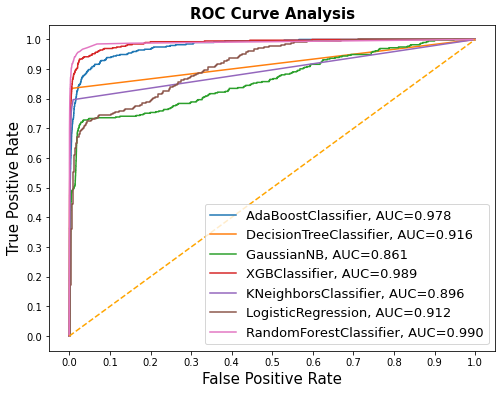

In [ ]:
# Plotting ROC curve 

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

## **Hyperparameter**

### **Randomized Search CV**

In [ ]:
param_grid = { 
    'bootstrap': [False],
    'max_depth': [80],
    'max_features': ['sqrt'],
    'min_samples_leaf': [15],
    'min_samples_split': [2],
    'n_estimators': [500] 
}

In [ ]:
best_rf = RandomizedSearchCV(estimator=clf, param_distributions = param_grid, cv = 3, verbose=2, n_jobs = -1)
best_rf.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 46.8min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
best_random = best_rf.best_estimator_
best_random

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=80, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
print("Train Results")
pred_train = best_random.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print('\n')
print(classification_report(y_train, pred_train))
print('\n')
print("MAE test score:", mean_absolute_error(y_train, pred_train))
print("RMSE test score:", sqrt(mean_squared_error(y_train, pred_train)))

Train Results
[[397891    379]
 [   114 398156]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    398270
           1       1.00      1.00      1.00    398270

    accuracy                           1.00    796540
   macro avg       1.00      1.00      1.00    796540
weighted avg       1.00      1.00      1.00    796540



MAE test score: 0.0006189268586637206
RMSE test score: 0.024878240666568862


In [ ]:
print("Test Results")
pred_test = best_random.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print('\n')
print(classification_report(y_test, pred_test))
print('\n')
print("MAE test score:", mean_absolute_error(y_test, pred_test))
print("RMSE test score:", sqrt(mean_squared_error(y_test, pred_test)))

Test Results
[[99456   150]
 [   78   316]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99606
           1       0.68      0.80      0.73       394

    accuracy                           1.00    100000
   macro avg       0.84      0.90      0.87    100000
weighted avg       1.00      1.00      1.00    100000



MAE test score: 0.00228
RMSE test score: 0.047749345545253286


### **Grid Search CV**

In [ ]:
param_grid = { 
    'bootstrap': [False],
    'max_depth': [100],
    'max_features': ['sqrt'],
    'min_samples_leaf': [30],
    'min_samples_split': [2],
    'n_estimators': [500] 
}

In [ ]:
best_rf = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 3, verbose=2, n_jobs = -1)
best_rf.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed: 44.6min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=200, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
best_grid = best_rf.best_estimator_
best_grid

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
print("Train Results")
pred_train = best_grid.predict(X_train)

print(confusion_matrix(y_train, pred_train))
print('\n')
print(classification_report(y_train, pred_train))
print('\n')
print("MAE test score:", mean_absolute_error(y_train, pred_train))
print("RMSE test score:", sqrt(mean_squared_error(y_train, pred_train)))

Train Results
[[397556    714]
 [   125 398145]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    398270
           1       1.00      1.00      1.00    398270

    accuracy                           1.00    796540
   macro avg       1.00      1.00      1.00    796540
weighted avg       1.00      1.00      1.00    796540



MAE test score: 0.001053305546488563
RMSE test score: 0.03245466910151085


In [ ]:
print("Test Results")
pred_test = best_grid.predict(X_test)

print(confusion_matrix(y_test, pred_test))
print('\n')
print(classification_report(y_test, pred_test))
print('\n')
print("MAE test score:", mean_absolute_error(y_test, pred_test))
print("RMSE test score:", sqrt(mean_squared_error(y_test, pred_test)))

Test Results
[[99374   232]
 [   67   327]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99606
           1       0.58      0.83      0.69       394

    accuracy                           1.00    100000
   macro avg       0.79      0.91      0.84    100000
weighted avg       1.00      1.00      1.00    100000



MAE test score: 0.00299
RMSE test score: 0.05468089245796926


## **Feature Important**

In [ ]:
feature_importances = pd.DataFrame(clf.feature_importances_,index = X.columns,columns=['importance']).sort_values('importance',ascending=False)

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = clf.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in clf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.082 seconds


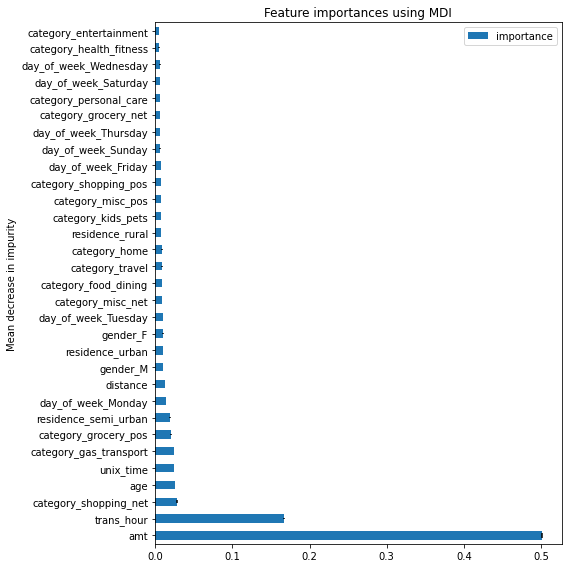

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
feature_importances.plot.barh(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# **Business Impact**

## **Cost Benefit Analysis**

In [ ]:
pd.concat(
[df['amt'].describe(percentiles = [0.5,0.95,0.999])\
.reset_index().rename(columns={'index': 'Row Type', 'amt':'Overall Amt Distribution'}),
df.loc[df['is_fraud']==0,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Non Fraud Amt Distribution'}),
df.loc[df['is_fraud']==1,['amt']].describe(percentiles = [0.5,0.95,0.999])\
.reset_index(drop = 1).rename(columns={'amt':'Fraud Amt Distribution'})],
axis=1
)

,Row Type,Overall Amt Distribution,Non Fraud Amt Distribution,Fraud Amt Distribution
0,count,1.852394e+06,1.842743e+06,9651.000000
1,mean,7.006357e+01,6.765128e+01,530.661412
2,std,1.592540e+02,1.535481e+02,391.028873
3,min,1.000000e+00,1.000000e+00,1.060000
4,50%,4.745000e+01,4.724000e+01,390.000000
5,95%,1.953400e+02,1.895900e+02,1084.090000
6,99.9%,1.517241e+03,1.519623e+03,1293.127000
7,max,2.894890e+04,2.894890e+04,1376.040000


In [ ]:
#Monthly num_of_fraud_transactions  
df_timeline02

,Year Month,Number of Non Fraud Transactions,Non Fraud Customers
0,2019-01,52019,908
1,2019-02,49349,908
2,2019-03,70445,908
3,2019-04,67702,908
4,2019-05,72124,908
5,2019-06,85710,908
6,2019-07,86265,908
7,2019-08,86977,908
8,2019-09,70234,908
9,2019-10,68304,908


In [ ]:
#Average number of fraudulent transaction per month
df_timeline02['Number of Non Fraud Transactions'].mean()

76780.95833333333

In [ ]:
df_timeline01

,Year Month,Number of Fraud Transactions,Fraud Customers
0,2019-01,506,50
1,2019-02,517,53
2,2019-03,494,49
3,2019-04,376,41
4,2019-05,408,42
5,2019-06,354,35
6,2019-07,331,36
7,2019-08,382,39
8,2019-09,418,44
9,2019-10,454,50


In [ ]:
#Average Number of transactions by month(Cost Benifit Analysis)
print(df_timeline01['Number of Fraud Transactions'].mean())

402.125


In [ ]:
df_fraud=df[['is_fraud','trans_date_trans_time']].groupby('is_fraud').count().reset_index()
df_fraud.columns=['is_fraud','count']
df_fraud['percentage']=(df_fraud['count']/df_fraud['count'].sum())*100
df_fraud

,is_fraud,count,percentage
0,0,1842743,99.478999
1,1,9651,0.521001


In [ ]:
df['ques'] = 1

In [ ]:
print(f"Average number of transactions per month: {round(df.groupby(['year_month','ques'])['ques'].sum().mean(),2)}")
print(f"Average number of fraudulent transaction per month: {round(fraud.groupby(['year_month','is_fraud'])['is_fraud'].count().mean(),2)}")
print(f"Average amount per fraud transaction: {round(fraud.amt.sum()/len(fraud),2)}")

Average number of transactions per month: 77183.08
Average number of fraudulent transaction per month: 402.12
Average amount per fraud transaction: 530.66
